In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import numpy as np

In [18]:
train = pd.read_csv("train_V1.csv")

In [3]:
train.head()

,Unnamed: 0,Parcel_ID,logerror,tran_date,AC_Type,Arch_Type,Basement_Area,Bath_Count,Bed_Count,Frame_Type,...,Story_Count,Fireplace_YN,Tax_structure_Value,Tax_total_Value,Tax_assess_Year,Taxable_land_Value,Tax_Amount,Tax_delinq_YN,Tax_delinq_Year,Census
0,0,11016594,0.0276,2016-01-01,1.0,Unknown,0.0,2.0,3.0,Unknown,...,-1.0,False,122754.0,360170.0,2015.0,237416.0,6735.88,N,-10000.0,60371066461000.0
1,1,14366692,-0.1684,2016-01-01,Unknown,Unknown,0.0,3.5,4.0,Unknown,...,-1.0,False,346458.0,585529.0,2015.0,239071.0,10153.02,N,-10000.0,Unknown
2,2,12098116,-0.0040,2016-01-01,1.0,Unknown,0.0,3.0,2.0,Unknown,...,-1.0,False,61994.0,119906.0,2015.0,57912.0,11484.48,N,-10000.0,60374638003000.0
3,3,12643413,0.0218,2016-01-02,1.0,Unknown,0.0,2.0,2.0,Unknown,...,-1.0,False,171518.0,244880.0,2015.0,73362.0,3048.74,N,-10000.0,60372963002000.0
4,4,14432541,-0.0050,2016-01-02,Unknown,Unknown,0.0,2.5,4.0,Unknown,...,2.0,False,169574.0,434551.0,2015.0,264977.0,5488.96,N,-10000.0,60590423381000.0


In [4]:
train.shape

(90275, 58)

In [20]:
train = train.drop("Unnamed: 0", axis = 1)

## Response variable

In [5]:
y = train.logerror

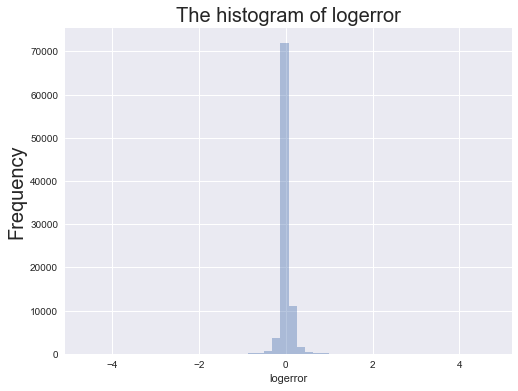

In [8]:
plt.figure(figsize=(8, 6))
ax = sns.distplot(y, kde = False)
ax.set_title("The histogram of logerror",fontsize = 20)
ax.set_ylabel("Frequency",fontsize = 20)

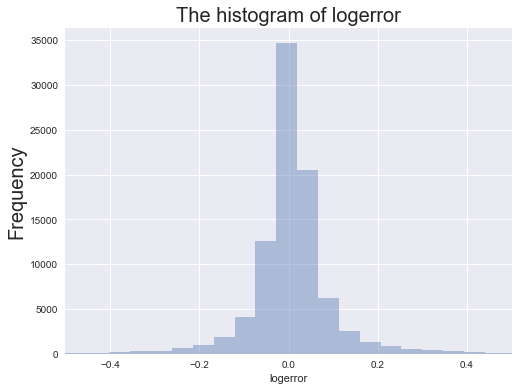

In [10]:
plt.figure(figsize=(8, 6))
ax = sns.distplot(y, kde = False, bins = 200)
ax.set(xlim = (-0.5, 0.5))
ax.set_title("The histogram of logerror",fontsize = 20)
ax.set_ylabel("Frequency",fontsize = 20)

## Correlation between variables

Somehow a few variables change back to numeric after reading csv using pandas. 

In [22]:
toobject = ["FIPS", "County", "Raw_census", "Zipcode", "Land_Type"]

for col in toobject:
    train[col] = train[col].astype("object")

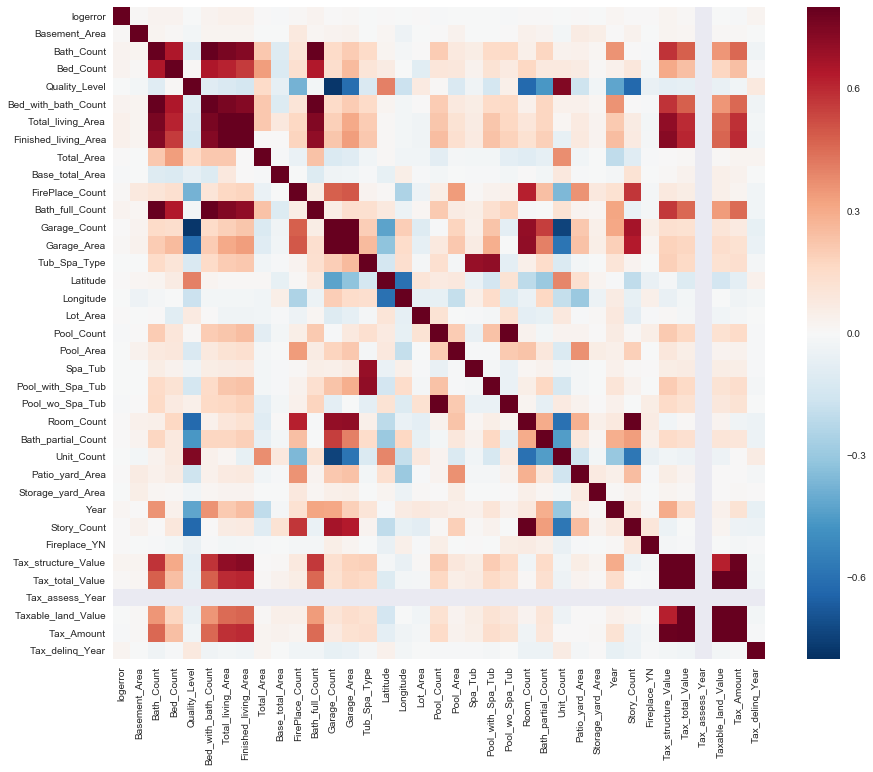

In [23]:
#correlation matrix
corrmat = train.iloc[:,1:].corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat, vmax=.8, square=True);

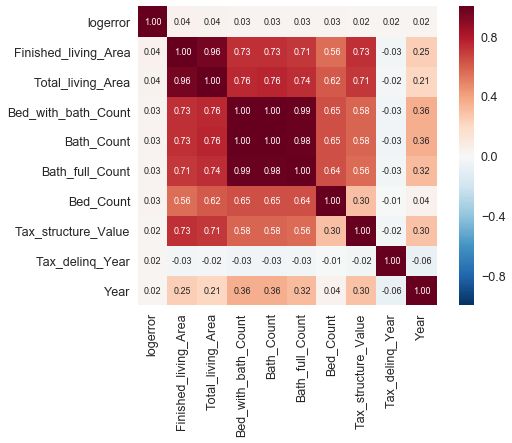

In [25]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'logerror')['logerror'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, annot_kws={'size': 9},square=True, fmt='.2f', 
                 yticklabels=cols.values, xticklabels=cols.values)